<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/KicapSambal/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 7: Comparison between libraries**



*   Code below is using the **`pandas`** library






**TEAM MEMBERS:**
```
ZUHAYR ARIF BIN ZAKARIA (MCS231002)
MOHD NOR BIN MOHIDIN (MCS231008)
NABILA HUSNA BINTI ROSLI (MCS231009)
NUR AZIMAH BINTI MOHD SALLEH (MCS231011)
```

###**Pick a Big Dataset**

In [1]:
from IPython.display import display, HTML, Javascript
html_content = """
<h1 style="font-size:40px;text-align:center;color:darkgreen;font-family:impact">Spotify Charts uisng Pandas</h1>
<center> This notebook analyzes a dataset containing over 26 million data points.  </center>"""
HTML(html_content)

###**Dataset :** `Spotify Charts`


###**About**
This complete dataset is about of all the "Top 200" and "Viral 50" charts published globally by Spotify with a file size of 3.48 GB.

It has 26,173,514 observations and 9 columns, including title, rank, date, artist, url, region, chart, trend, and stream. This dataset contains the top 200 streamed tracks on Spotify every day from Jan 1 2017 to Dec 31 2021, collected by using Spotify API.

###**Loading the Dataset**

In [1]:
# Upload kaggle.json API token, and download / unzip the Flight Price Prediction dataset

# Install and upload the kaggle.json file
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d dhruvildave/spotify-charts

 99% 937M/945M [00:11<00:00, 70.6MB/s]
100% 945M/945M [00:11<00:00, 85.2MB/s]


In [3]:
!unzip spotify-charts.zip

Archive:  spotify-charts.zip
  inflating: charts.csv              


## **Import libraries**

In [4]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## **1. Read Data**

In [5]:
%%time

# Read the combined csv file
df = pd.read_csv('charts.csv')

CPU times: user 1min 3s, sys: 11.8 s, total: 1min 15s
Wall time: 1min 16s


In [6]:
%%time

df

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs


,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


## **2. Data Exploration**

In [7]:
%%time

df.head()

CPU times: user 0 ns, sys: 1.43 ms, total: 1.43 ms
Wall time: 1.45 ms


,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [8]:
%%time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB
CPU times: user 8.27 ms, sys: 1.73 ms, total: 10 ms
Wall time: 16.4 ms


In [18]:
# Convert the 'date' datatype to allow for summary statistics that can be done later

df['date'] = df['date'].astype('datetime64[ns]')

In [19]:
%%time

df.describe()

CPU times: user 1.91 s, sys: 522 ms, total: 2.44 s
Wall time: 2.44 s


,rank,streams
count,2.617351e+07,2.032190e+07
mean,8.092314e+01,5.526131e+04
std,5.918601e+01,2.095872e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,3.546000e+03
50%,6.700000e+01,9.565000e+03
75%,1.310000e+02,3.540900e+04
max,2.000000e+02,1.974970e+07


In [20]:
%%time

df.shape

CPU times: user 26 µs, sys: 3 µs, total: 29 µs
Wall time: 33.6 µs


(26173514, 9)

In [21]:
#Data Exploration For Column 'title'

%%time

df['title'].nunique()

CPU times: user 4.03 s, sys: 25.9 ms, total: 4.05 s
Wall time: 4.04 s


164806

In [12]:
%%time

df['title']

CPU times: user 69 µs, sys: 12 µs, total: 81 µs
Wall time: 96.3 µs


0                 Chantaje (feat. Maluma)
1             Vente Pa' Ca (feat. Maluma)
2              Reggaetón Lento (Bailemos)
3                                  Safari
4                             Shaky Shaky
                        ...              
26173509                              BYE
26173510                          Pillars
26173511                     Gái Độc Thân
26173512    Renegade (feat. Taylor Swift)
26173513                  Letter to Jarad
Name: title, Length: 26173514, dtype: object

In [13]:
#Data Exploration For Column 'artist'

%%time

df['artist'].nunique()

CPU times: user 3.15 s, sys: 31.1 ms, total: 3.18 s
Wall time: 3.18 s


96156

In [14]:
%%time

df['artist']

CPU times: user 54 µs, sys: 9 µs, total: 63 µs
Wall time: 67 µs


0                                         Shakira
1                                    Ricky Martin
2                                            CNCO
3           J Balvin, Pharrell Williams, BIA, Sky
4                                    Daddy Yankee
                            ...                  
26173509                                    Jaden
26173510                                   My Anh
26173511                                    Tlinh
26173512                          Big Red Machine
26173513                LRN Slime, Shiloh Dynasty
Name: artist, Length: 26173514, dtype: object

In [15]:
#Data Exploration For Column 'region'

%%time

df['region'].nunique()

CPU times: user 1.29 s, sys: 165 ms, total: 1.45 s
Wall time: 1.45 s


70

In [16]:
%%time

df['region'].unique()

CPU times: user 1.29 s, sys: 147 ms, total: 1.44 s
Wall time: 1.44 s


array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Bolivia', 'Denmark', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Czech Republic', 'Finland', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Estonia', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Malaysia', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain',
       'Slovakia', 'Sweden', 'Taiwan', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Thailand',
       'Andorra', 'Romania', 'Vietnam', 'Egypt', 'India', 'Israel',
       'Morocco', 'Saudi Arabia', 'South Africa', 'United Arab Emirates',
       'Russia', 'Ukraine', 'South Korea'], dtype=object)

In [22]:
# date Datatype has been converted into datetime64 earlier before performing basic statistic.

%%time

df['year'] = df['date'].dt.year

CPU times: user 3.15 s, sys: 194 ms, total: 3.35 s
Wall time: 5.47 s


In [23]:
%%time

songs_per_year = df.groupby('year').agg({'title': 'count'})
print(songs_per_year)


        title
year         
2017  4401145
2018  4863016
2019  5412658
2020  5793148
2021  5703536
CPU times: user 3.69 s, sys: 161 ms, total: 3.85 s
Wall time: 4.97 s


# **3. EDA Visualization**

### **Top 5 artists**

In [20]:
# Top 5 artists

%%time

counts = df['artist'].value_counts()
counts.head()

CPU times: user 3.38 s, sys: 29 ms, total: 3.41 s
Wall time: 3.39 s


Ed Sheeran       387917
Billie Eilish    251825
Post Malone      211272
Bad Bunny        203403
Ariana Grande    189914
Name: artist, dtype: int64

### **Bottom 5 artists**

In [21]:
# Bottom 5 artists

%%time

counts = df['artist'].value_counts()
counts.tail()

CPU times: user 3.27 s, sys: 26.3 ms, total: 3.29 s
Wall time: 3.29 s


Ezhel, Patron, Anıl Piyancı, Sansar Salvo, Allame, Pit10, Beta, Kamufle    1
Lips, George Mason, Rose McIver, Kimbra                                    1
Joakim Kleven, KOH                                                         1
Lazyloxy, Maiyarap, OG-ANIC, UrboyTJ                                       1
Luna 99                                                                    1
Name: artist, dtype: int64

###**Distribution of Streams Among Regions**

Below is a breakdown of the total streams from each region. The United States is the clear front-runner, making up 23.1% of total streams. Of the top five artists with the most overall streams, all are American besides Drake (Canadian). The United States is a huge market for music and seems to be dominating.

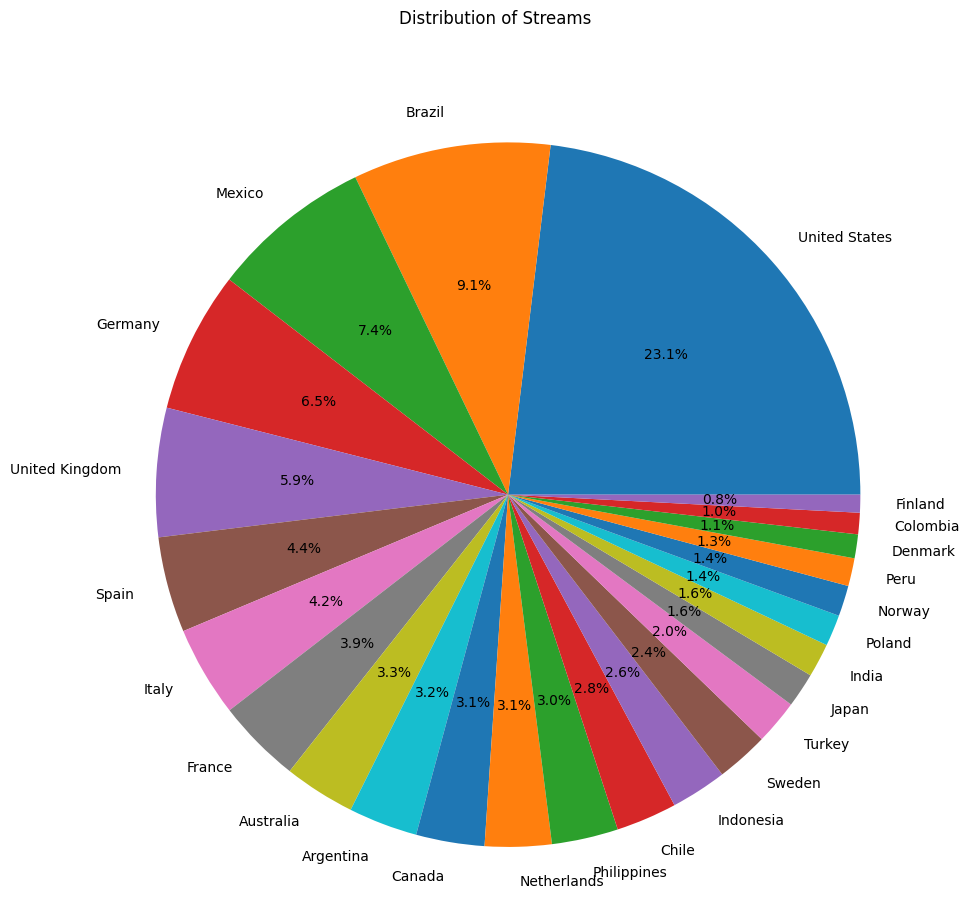

In [22]:
%%time

global_200 = df.query("chart == 'top200'")
streams_df = global_200.groupby('region')['streams'].sum() / 1000000000

streams_df = streams_df.drop("Global")

streams_df = streams_df.sort_values(ascending = False).head(25)
countries = list(streams_df.index.values)

fig_streams, ax_streams = plt.subplots(figsize=(10, 10))
ax_streams.pie(x = streams_df, labels = countries, autopct='%.1f%%')

ax_streams.axis('equal')
fig_streams.suptitle("Distribution of Streams")
plt.show()

###**Artist had Most Total Streams in US**

In [23]:
#Artist that have most total streams

%%time

top_200_pop = df[(df['chart'] == 'top200') & (df['region'] == 'United States')]

# Select relevant columns
artists_streams = top_200_pop[['artist', 'streams']]

artists, counts = np.unique(artists_streams['artist'], return_counts=True)
all_streams = []
keep_track = []

for a in artists:
    result = artists_streams.loc[artists_streams['artist'] == a, 'streams'].sum()
    keep_track.append(a)
    all_streams.append(result)

dict_top_streams = {keep_track[i]: all_streams[i] for i in range(len(all_streams))}

all_streams_sort = sorted(dict_top_streams.items(), key=lambda x: x[1], reverse=True)

sorted_top_streams = pd.DataFrame(all_streams_sort).head(5)
sorted_top_streams.loc[:, 1] = sorted_top_streams.loc[:, 1] / 1000000

sorted_top_streams = sorted_top_streams.rename(columns={0: 'Artist', 1: 'Streams (millions)'})
sorted_top_streams

CPU times: user 4.79 s, sys: 2.93 s, total: 7.72 s
Wall time: 7.7 s
CPU times: user 1min 20s, sys: 207 ms, total: 1min 20s
Wall time: 1min 20s


,Artist,Streams (millions)
0,Post Malone,4966.682478
1,Drake,4697.961521
2,Juice WRLD,4400.300033
3,XXXTENTACION,3436.491646
4,Billie Eilish,2892.423843


###**Top 50 Stream List For Each Day**

In [24]:
# Top 50 list for each day

%%time

top50 = df[(df['chart'] == 'top200') & (df['rank'] <= 50)]  # get the top50
#top50 = top50.drop(['chart'])  # drop the 'chart' column
top50

CPU times: user 4.89 s, sys: 520 ms, total: 5.41 s
Wall time: 5.51 s


,title,rank,date,artist,url,region,chart,trend,streams,year
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,2017
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0,2017
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,2017
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0,2017
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0,2017
...,...,...,...,...,...,...,...,...,...,...
25275919,Explícale (feat. Bad Bunny),46,2018-01-31,Yandel,https://open.spotify.com/track/1LszjjoVwDDZcWU...,Uruguay,top200,MOVE_DOWN,4560.0,2018
25275920,Nena Maldicion (feat. Lenny Tavarez),47,2018-01-31,"Paulo Londra, Lenny Tavárez",https://open.spotify.com/track/3TnhQSRwT3AVMdX...,Uruguay,top200,MOVE_UP,4406.0,2018
25275921,Ahora Dice,48,2018-01-31,"Chris Jedi, J Balvin, Ozuna, Arcangel",https://open.spotify.com/track/22eADXu8DfOAUED...,Uruguay,top200,SAME_POSITION,4316.0,2018
25275922,La fórmula (feat. Chris Jedi),49,2018-01-31,"De La Ghetto, Daddy Yankee, Ozuna",https://open.spotify.com/track/4XCQtUoRSh22Ep1...,Uruguay,top200,SAME_POSITION,4272.0,2018


###**Visualization of Top 50 Artist Popularity**

In [25]:
#Instal wordcloud to visualized Top50 Artist popularity
!pip install wordcloud

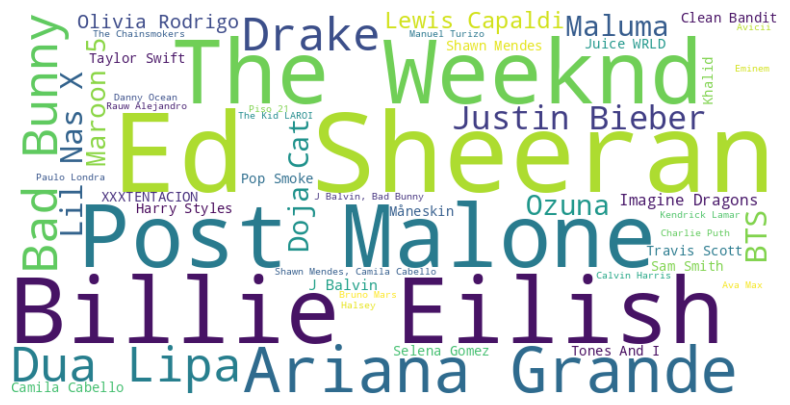

CPU times: user 4.01 s, sys: 437 ms, total: 4.44 s
Wall time: 4.42 s


In [26]:
#Visualization of artist popularity

%%time

from wordcloud import WordCloud

top50 = df[(df['chart'] == 'top200') & (df['rank'] <= 50)]

# Get the counts of each artist
counts = top50['artist'].value_counts()

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(counts.to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###**Top 10 Artist Ranking by Total Streams in All Regions**

In [25]:
## Calculate the top 10 artist ranking by total streams in all regions

%%time

# Assuming 'df' is your DataFrame
artist_ranking = df.groupby(by='artist')['streams'].sum().reset_index()

# Rename the columns
artist_ranking.columns = ['artist', 'streams']

# Sort the artists by total streams in descending order
sorted_top_artists = artist_ranking.sort_values(by='streams', ascending=False).head(10)

# Display the result
sorted_top_artists


CPU times: user 4.62 s, sys: 160 ms, total: 4.78 s
Wall time: 4.77 s


,artist,streams
23921,Ed Sheeran,2.359566e+10
67599,Post Malone,1.945275e+10
22824,Drake,1.818064e+10
10203,Billie Eilish,1.719380e+10
6152,Ariana Grande,1.537585e+10
23033,Dua Lipa,1.214711e+10
41204,Juice WRLD,1.213308e+10
89322,XXXTENTACION,1.207190e+10
83159,The Weeknd,1.204280e+10
63785,Olivia Rodrigo,9.517652e+09


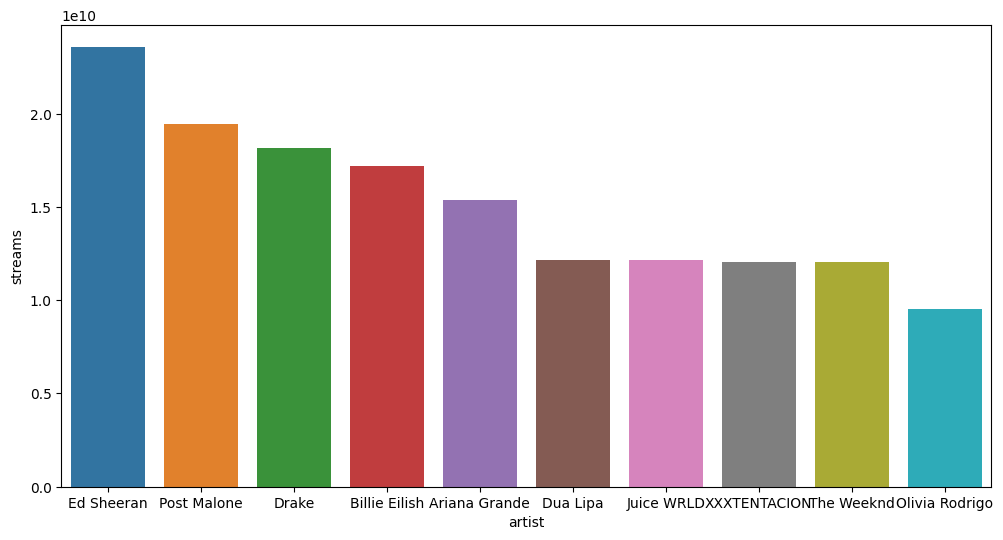

CPU times: user 426 ms, sys: 111 ms, total: 537 ms
Wall time: 462 ms


In [27]:
%%time
plt.figure(figsize=(12, 6))
# sns.barplot(x='streams_sum',y='artist',data=(top_10_overall_artists))
sns.barplot(x=sorted_top_artists.artist,y=sorted_top_artists.streams,data=(sorted_top_artists))
plt.show()

###**Total Song Released for Each Year**

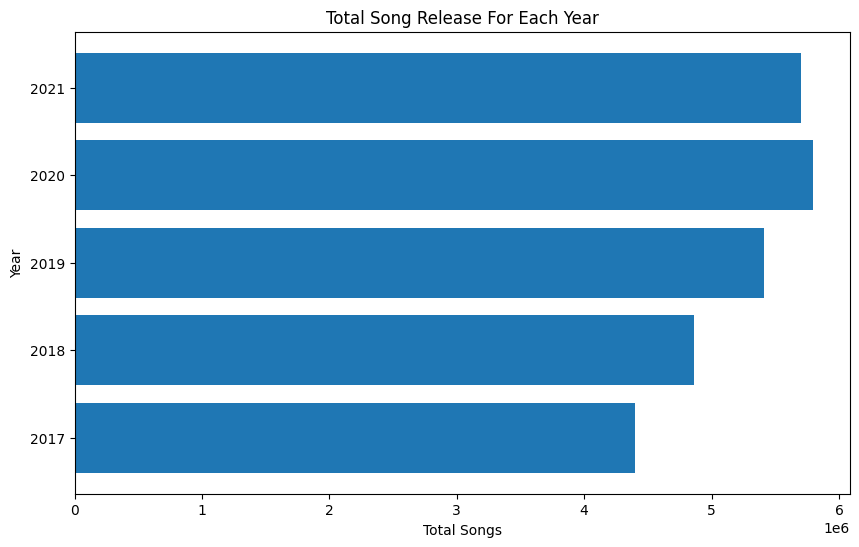

CPU times: user 341 ms, sys: 40.3 ms, total: 382 ms
Wall time: 460 ms


In [33]:
%%time

# Assuming 'songs_per_year' is a Pandas DataFrame
df_pandas = songs_per_year.reset_index()

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_pandas['year'], df_pandas['title'])
plt.xlabel('Total Songs')
plt.ylabel('Year')
plt.title('Total Song Release For Each Year')
plt.show()
